# Plots für Zoras Bachelorarbeit. Informativ, awesome und nicht gelb.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
from matplotlib.transforms import ScaledTranslation
import math
from Modell_2_as_function import mindestabstand
from Modell_2_as_function import maximalabstand
from Modell_2_as_function import wasserschicht_planet

Abschätzung Sternenabhängigkeit:

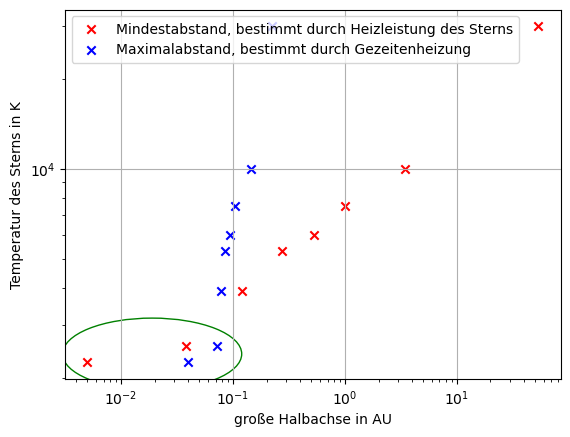

<Figure size 640x480 with 0 Axes>

In [69]:
a_min = [] #große Halbachse mindestens
a_max = [] # große Halbachse maximal


#graphen für sternabhängigkeit
R_stern = [6,3.5,1.8,1.5,1,0.8,0.6,0.1] 
T_stern = [30e3,10e3,7.5e3,6e3,5.3e3,3.9e3,2.55e3,2.25e3] # in Kelvin
M_stern = [18,5,1.9,1.4,1,0.8,0.6,0.1] 
R_planet = 10e6
M_planet = 5513*4/3*math.pi*R_planet**3 #Masse des Planeten ausgerechnet über die dichte, erddichte als referenzwert 
A_B = 0.9 #0.1 bis 0.9
e = 0.5 #0.1 bis 0.9

k_2 = 0.3 #0.01 bis 1, 0.3 bei der erde
Q = 100 #1 bis 10**6


# M_stern = np.linspace(0.1,5,50)
# R_stern = M_stern
# T_stern = M_stern**(3/8) * 5778 # K
# print(M_stern, R_stern, T_stern)

for i in range(len(R_stern)):
    R_stern[i] = R_stern[i]*6.96342*10**8 # *6.96342*10**8 weil sonnenradius
    M_stern[i] = M_stern[i]*1.989*10**30 # *1.989*10**30 weil sonnenmasse
    
for i in range(len(R_stern)):
    a_min.append(mindestabstand(R_stern[i], T_stern[i], A_B))
    a_max.append(maximalabstand(M_stern[i],273.15, R_planet, e, k_2, Q))

# Konvertierung in AU
x1 = [i * 1/149597870000 for i in a_min]
x2 = [i * 1/149597870000 for i in a_max]
y = T_stern

f=lambda x,m,b: m*x+b 

fig, ax = plt.subplots()
ax.scatter(x1,y,color='r',marker='x',label="Mindestabstand, bestimmt durch Heizleistung des Sterns")
ax.scatter(x2,y,color='b',marker='x',label="Maximalabstand, bestimmt durch Gezeitenheizung")
ax.legend()
#ax.set_xlim(0,1.1)
#ax.set_ylim(1800,7700)
ax.grid(True)
ax.set_xlabel("große Halbachse in AU")
ax.set_ylabel("Temperatur des Sterns in K")
ax.set_yscale('log')
ax.set_xscale('log')

# print(x1,x2)

# Transformeirte 

# Ellipse centre coordinates
x, y = 1.9e-2, 2.4e3

# Ellipse axes
scale = 0.8
ell_a, ell_b = 2, 0.3

# use the axis scale tform to figure out how far to translate 
ell_offset = ScaledTranslation(x, y, ax.transScale)

# construct the composite tform
ell_tform = ell_offset + ax.transLimits + ax.transAxes
ellipse = mpl.patches.Ellipse((0,0),ell_a*scale,ell_b*scale,transform=ell_tform,facecolor='none',edgecolor='green')
ax.add_patch(ellipse)

plt.show()

plt.savefig('plots_done_by_hannes/Abschätzung ohne O,B-Stern.pdf')